# Introduction to kinetic modeling with SBML

Kinetic modeling based on ordinary differential equations (ODE) plays an important role in computational biology. An important aspect of such models is its reusability and the reproducibility of the results. An important step towards reproducible and understandable models was the introduction of standard formats for model description (SBML, CellML, BioPax) and guidlines for model description (MIRIAM) and simulation description (MIASE) were developed. These standards are currently supported by a wide range of libraries and software tools, providing a rich environment for the work with such models.  
In addition to standard formats, IPython notebooks provide the visual framework for representing model setup, simulation and results in a unified and reproducible way.

This notebook demonstrates the basic work with computational models based on the Systems Biology Markup Language (SBML), the de facto standard for kinetic models in biology.  
As part of the introduction standard tools in python for the interaction with SBML based models are presented, like libSBML, Antimony and RoadRunner. ODE simulations are demonstrated.

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## libSBML
An important part of the work with SBML is the possibilty to modify models.  
Some GUI based modeling environments are available, like CellDesigner or BioUML.  
To programatically interact with SBML the SBML library libSBML (http://www.sbml.org) is the option of choice.

In [7]:
!ls    # available files

01_demo_simple.ipynb  Koenig_demo_distributions_01.csv
02_demo_django.ipynb  Koenig_demo.xml


Loading model with libsbml and inspect main model features.

In [9]:
import libsbml

In [10]:
doc = libsbml.readSBMLFromFile("Koenig_demo.xml") 
model = doc.getModel()
print model

<Model Koenig_demo "Koenig2014_demo_kinetic_v7">


Print model information like model id, and listOfSpecies

In [12]:
print(model.getId())
print(model.getListOfSpecies())
for s in model.getListOfSpecies():
    print s.getId(), s.getName(), s.getUnits()

Koenig_demo
<ListOfSpecies[6]>
A_in A inside mole
B_in B inside mole
C_in C inside mole
A_out A outside mole
B_out B outside mole
C_out C outside mole


## Antimony

Loading SBML with Antimony and get human readable representation of the information.

In [14]:
import libantimony
libantimony.loadSBMLFile('Koenig_demo.xml')
mod_names = libantimony.getModuleNames()
print mod_names

('__main', 'Koenig_demo')


In [15]:
ant_string = libantimony.getAntimonyString('Koenig_demo')
print(ant_string)

//Created by libAntimony v2.7.0
model *Koenig_demo()

  // Compartments and Species:
  compartment outside, inside;
  species A_in in inside, B_in in inside, C_in in inside, A_out in inside;
  species B_out in inside, C_out in inside;

  // Reactions:
  b1: A_out => A_in; (scale_f*(Vmax_b1/Km_A)*(A_out - A_in))/(1 + A_out/Km_A + A_in/Km_A);
  b2: B_in => B_out; (scale_f*(Vmax_b2/Km_B)*(B_in - B_out))/(1 + B_out/Km_B + B_in/Km_B);
  b3: C_in => C_out; (scale_f*(Vmax_b3/Km_C)*(C_in - C_out))/(1 + C_out/Km_C + C_in/Km_C);
  v1: A_in -> B_in; (scale_f*Vmax_v1)/Km_A*(A_in - 1/Keq_v1*B_in);
  v2: A_in -> C_in; (scale_f*Vmax_v2)/Km_A*A_in;
  v3: C_in -> A_in; (scale_f*Vmax_v3)/Km_A*C_in;
  v4: C_in -> B_in; (scale_f*Vmax_v4)/Km_A*(C_in - 1/Keq_v4*B_in);

  // Species initializations:
  A_in = 0;
  A_in has mM;
  B_in = 0;
  B_in has mM;
  C_in = 0;
  C_in has mM;
  A_out = 10;
  A_out has mM;
  B_out = 0;
  B_out has mM;
  C_out = 0;
  C_out has mM;

  // Compartment initializations:
  outsid

## RoadRunner simulations

Example simulations with the demo network.
First import roadrunner for simulations.

TODO: provide proper packages for imports of the individual components.

In [16]:
import roadrunner
roadrunner.getVersionStr()

'1.3; Compiler: gcc 4.6.3, C++ version: 1; JIT Compiler: LLVM-3.4; Date: Jan 12 2015, 16:43:38'

Loading the model and performing a simple time course simulation.

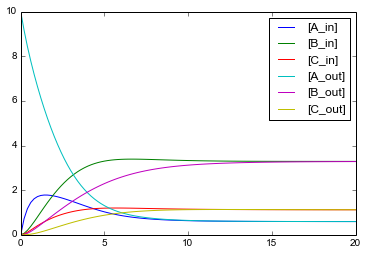

    time,   [A_in],    [B_in],    [C_in],  [A_out],   [B_out],    [C_out]
 [[    0,        0,         0,         0,       10,         0,          0],
  [  0.2, 0.722291, 0.0636592, 0.0359636,  9.16249, 0.0139675, 0.00162488],
  [  0.4,  1.17055,  0.201192,  0.115256,  8.43493, 0.0676093,  0.0104605],
  [  0.6,  1.44715,  0.380665,  0.211106,  7.78432,  0.148245,  0.0285142],
  [  0.8,  1.61452,  0.583941,  0.310233,  7.19123,  0.244987,  0.0550899],
  [    1,  1.71135,  0.799307,  0.406296,  6.64383,  0.350635,  0.0885847],
  [  1.2,  1.76188,   1.01801,   0.49659,   6.1348,  0.461449,    0.12728],
  [  1.4,  1.78147,   1.23435,    0.5801,  5.65954,  0.574888,   0.169664],
  [  1.6,   1.7799,   1.44434,  0.656713,  5.21515,  0.689422,    0.21448],
  [  1.8,  1.76358,   1.64545,  0.726598,  4.79972,  0.803894,   0.260748],
  [    2,  1.73685,   1.83601,  0.790009,  4.41194,  0.917468,   0.307715],
  [  2.2,  1.70218,     2.015,  0.847488,  4.05102,   1.02958,   0.354739],
  [  2.4,  1.6

In [18]:
rr = roadrunner.RoadRunner('Koenig_demo.xml')
rr.simulate(0,20, 100, plot=True)  # equidistant timecourse for 20 [s]

### Selections

The content of the numerical output is defined via selections. Via selections the, components of the model we are interested in can be selected.
Currently only the time and all concentrations of the model are selected.

In [21]:
print rr.selections

['time', '[A_in]', '[B_in]', '[C_in]', '[A_out]', '[B_out]', '[C_out]']


In [29]:
# get all the compartment volumes at end point
print rr.model.getCompartmentIds()
print rr.model.getCompartmentVolumes()

['outside', 'inside']
[  1.00000000e-06   1.00000000e-06]


In [31]:
# get all the reactionRates at end point
print rr.model.getReactionIds()
print rr.model.getReactionRates()

['b1', 'b2', 'b3', 'v1', 'v2', 'v3', 'v4']
[  2.64980208e-10   2.13326815e-09  -9.89684422e-10   2.64268253e-07
   2.96582787e-07   5.60138389e-07  -2.62104914e-07]


Now we are interested in the rates. Adding them to the selection, and plot them.

In [38]:
rr.selections = ['time'] + rr.model.getReactionIds()
print rr.selections

['time', 'b1', 'b2', 'b3', 'v1', 'v2', 'v3', 'v4']


In [42]:
rr.reset() # reset to initial concentrations
s  = rr.simulate(0,20, 100, plot=False)  # equidistant timecourse for 20 [s]

In [43]:
s

    time,          b1,          b2,           b3,          v1,          v2,          v3,           v4
 [[    0, 4.54545e-06,           0,            0,           0,           0,           0,            0],
  [  0.2, 3.87706e-06, 1.72055e-07,  2.26092e-08, 7.15925e-07, 3.61145e-07, 1.79818e-08,  2.06702e-09],
  [  0.4, 3.42482e-06, 3.47509e-07,  6.70538e-08, 1.15043e-06, 5.85277e-07, 5.76281e-08,  7.33006e-09],
  [  0.6,  3.0969e-06, 4.51778e-07,  1.12724e-07, 1.40908e-06, 7.23573e-07, 1.05553e-07,   1.0387e-08],
  [  0.8, 2.84359e-06, 5.10116e-07,  1.51631e-07, 1.55613e-06,  8.0726e-07, 1.55116e-07,  9.13119e-09],
  [    1, 2.63623e-06, 5.43864e-07,  1.81815e-07, 1.63142e-06, 8.55675e-07, 2.03148e-07,   3.3215e-09],
  [  1.2, 2.45761e-06, 5.62333e-07,  2.03821e-07, 1.66008e-06,  8.8094e-07, 2.48295e-07, -6.20657e-09],
  [  1.4, 2.29716e-06, 5.71148e-07,  2.18913e-07, 1.65803e-06, 8.90733e-07,  2.9005e-07, -1.85363e-08],
  [  1.6, 2.14836e-06, 5.73262e-07,  2.28474e-07, 1.63547e-06,  8.

In [44]:
print('A_in = {}'.format(rr.A_in))
print('Vmax_b1 = {}'.format(rr.Vmax_b1))

A_in = 0.593165574596
Vmax_b1 = 5.0


The units can be read out from the SBML file.

In [45]:
print model
print type(model)

<Model Koenig_demo "Koenig2014_demo_kinetic_v7">
<class 'libsbml.Model'>


In [46]:
s = model.getSpecies('A_in')
print s, s.getId(), s.getName()
print s.getUnits()   # has mole as unit due to substance units
print s.has_only_substance_units

print s.toSBML()

udef =  s.getDerivedUnitDefinition()
libsbml.UnitDefinition_printUnits(udef)

<Species A_in "A inside"> A_in A inside
mole
False
<species id="A_in" name="A inside" compartment="inside" initialConcentration="0" substanceUnits="mole" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>


'mole (exponent = 1, multiplier = 1, scale = 0), metre (exponent = -3, multiplier = 1, scale = 0)'

## Steady States

Proper simulation to steady state (i.e. with NEQ solvers and not just based on letting the simulation run for long).

In [47]:
# ? what does the value for time mean here ? 
# bug in the setup
print rr.selections
print rr.getSteadyStateValues()

['time', 'b1', 'b2', 'b3', 'v1', 'v2', 'v3', 'v4']
[ 0.59626946  3.31260812  1.12628676  0.59626926  3.31256046  1.12628659]


## Stoichiometric Matrix

Access to the stoichiometric matrix of the system is simple via

In [48]:
rr.getFullStoichiometryMatrix()

         b1, b2, b3, v1, v2, v3, v4
A_in  [[  1,  0,  0, -1, -1,  1,  0],
B_in   [  0, -1,  0,  1,  0,  0,  1],
C_in   [  0,  0, -1,  0,  1, -1, -1],
A_out  [ -1,  0,  0,  0,  0,  0,  0],
B_out  [  0,  1,  0,  0,  0,  0,  0],
C_out  [  0,  0,  1,  0,  0,  0,  0]]

In [49]:
rr.getConservationMatrix()

 [[ 1, 1, 1, 1, 1, 1]]

## Jacobian Matrix

Access to Jacobian matrix of the systems via

In [50]:
rr.getFullJacobian()

                 A_in,         B_in,         C_in,        A_out,        B_out,        C_out
A_in  [[ -3.78046e-06,        1e-07,        5e-07,  2.28046e-06,            0,            0],
B_in   [        1e-06, -6.30693e-07,        5e-07,            0,  2.80697e-07,            0],
C_in   [        5e-07,      2.5e-07, -1.38077e-06,            0,            0,  3.80766e-07],
A_out  [  2.28046e-06,            0,            0, -2.28046e-06,            0,            0],
B_out  [            0,  2.80693e-07,            0,            0, -2.80697e-07,            0],
C_out  [            0,            0,  3.80766e-07,            0,            0, -3.80766e-07]]

## Metabolic Control Analysis

Direct access to metabolic control analysis, for instance the Concentration control coefficients.

In [59]:
rr.getScaledConcentrationControlCoefficientMatrix()

 [[ -2.69032e-11,   9.3663e-10, -4.18109e-10,  -0.292398,  -0.223684,  0.422515,  0.0935673],
  [ -2.69032e-11,   9.3663e-10, -4.18109e-10,  0.0631579, -0.0236842, 0.0447368, -0.0842105],
  [ -2.69032e-11,   9.3663e-10, -4.18109e-10, -0.0309598,    0.18808, -0.355263,   0.198142],
  [  4.27461e-10,   9.3663e-10, -4.18109e-10,  -0.292398,  -0.223684,  0.422515,  0.0935673],
  [ -2.69032e-11, -1.91072e-09, -4.18109e-10,  0.0631579, -0.0236842, 0.0447368, -0.0842105],
  [ -2.69032e-11,   9.3663e-10,  3.32027e-09, -0.0309598,    0.18808, -0.355263,   0.198142]]

## Repeated simulations

Parameter scan or multiple simulations.
Direct storage of simulation results in a list of numpy arrays.

In [66]:
rr = roadrunner.RoadRunner('Koenig_demo.xml')

In [67]:
rr.Vmax_b1 # current value of Vmax_b1

5.0

In [68]:
# kinetic eqution of reaction b1
rids = [r.getId() for r in model.getListOfReactions()]
print rids
r_b1 = model.getReaction('b1')

['b1', 'b2', 'b3', 'v1', 'v2', 'v3', 'v4']


In [69]:
klaw_b1 = r_b1.getKineticLaw()
print 'b1 = {}'.format(klaw_b1.formula)

b1 = scale_f * (Vmax_b1 / Km_A) * (A_out - A_in) / (1 + A_out / Km_A + A_in / Km_A)


time : 0.965102910995 [s]


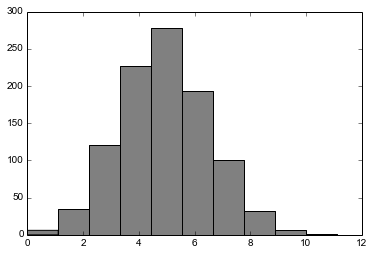

In [70]:
import odesim.roadrunner.roadrunner_tools as rt
import numpy as np
import time

# Create some parameter sampling
# Vmax_test = np.linspace(start=0, stop=10, num=20)
Vmax_test = np.random.normal(loc=5.0, scale=1.5, size=1000)
Vmax_test = np.maximum(0.0, Vmax_test)

t1 = time.time()
results = []
for Vmax in Vmax_test:
    # create a parameter dict for the simulation
    parameters = {'Vmax_b1': Vmax}
    inits = {}
    (s, _) = rt.simulation(rr, parameters, inits, t_start=0, t_stop=20, absTol=1e-08, relTol=1e-08, info=False)
    results.append(s)
plt.hist(Vmax_test, color='grey')
print 'time : {} [s]'.format(time.time() - t1)

Use matplotlib to plot the resulting curves.

In [71]:
# print r_b1.toSBML()

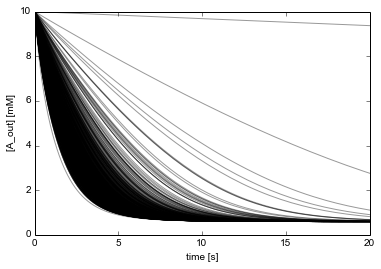

In [72]:
import matplotlib.pyplot as plt
for s in results:
    # plt.plot(results[0].transpose())
    plt.plot(s['time'], s['[A_out]'], color='black', alpha=0.4)
    plt.xlim(0, 20)
    plt.xlabel('time [s]')
    plt.ylabel('[A_out] [mM]')

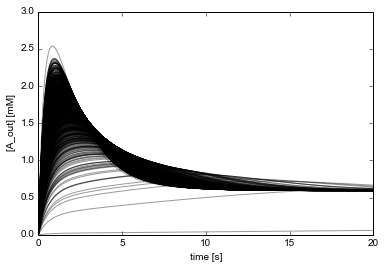

In [73]:
for s in results:
    # plt.plot(results[0].transpose())
    plt.plot(s['time'], s['[A_in]'], color='black', alpha=0.4)
    plt.xlim(0, 20)
    plt.xlabel('time [s]')
    plt.ylabel('[A_out] [mM]')

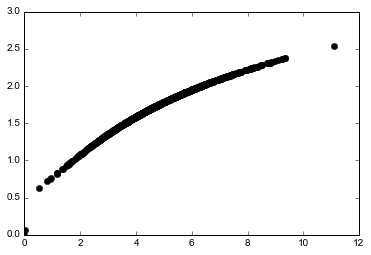

In [74]:
peaks = [max(s['[A_in]']) for s in results]
plt.plot(Vmax_test, peaks, 'o', color='black')